In [1]:
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\2526785967.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
for i in os.listdir('dataset'):
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [14]:

# let's make a list compreension for all the data in the folder
files = [file for file in os.listdir('dataset')]

# let's make a pandas DataFrame
all_months_data = pd.DataFrame()

# makes a loop for concat the data
for file in files:
    data = pd.read_csv("./dataset/"+file)
    all_months_data = pd.concat([all_months_data, data])

# Descriptive Analysis

In [15]:
all_months_data.shape

(186850, 6)

In [16]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [17]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [18]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [19]:
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [20]:
all_months_data[['Order ID', 'Product', 'Order Date', 'Purchase Address']].describe()

,Order ID,Product,Order Date,Purchase Address
count,186305,186305,186305,186305
unique,178438,20,142396,140788
top,Order ID,USB-C Charging Cable,Order Date,Purchase Address
freq,355,21903,355,355


In [21]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors = 'coerce')
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors = 'coerce')

In [22]:
all_months_data.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [23]:
profile = ProfileReport(all_months_data)
profile

C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:441: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\pandas_profiling\report\presentation\flavours\widget\correlation_table.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\pandas_profiling\report\presentation\flavours\widget\duplicate.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\pandas_profiling\report\presentation\flavours\widget\sample.py:1: DeprecationW

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          545
Purchase Address    545
dtype: int64

In [26]:
all_months_data[all_months_data["Order ID"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
all_months_data = all_months_data.dropna()
all_months_data.shape

(185950, 6)

In [28]:
all_months_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [29]:
# Sale Related
all_months_data['Sale'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']

C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\858082244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Sale'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']


In [30]:
# Address Related
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_months_data['State'] = all_months_data['Purchase Address'].apply(lambda x: x.split()[-2])
all_months_data['Postal Code'] = all_months_data['Purchase Address'].apply(lambda x: x.split()[-1])

C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\542836838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1])
C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\542836838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['State'] = all_months_data['Purchase Address'].apply(lambda x: x.split()[-2])
C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\542836838.py:4: Settin

In [31]:
# Time Related
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

all_months_data['Year'] = all_months_data['Order Date'].dt.year
all_months_data['Month'] = all_months_data['Order Date'].dt.month
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\278733621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])
C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\278733621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data['Year'] = all_months_data['Order Date'].dt.year
C:\Users\Naveen Kumar R\AppData\Local\Temp\ipykernel_14084\278733621.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [32]:
all_months_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,City,State,Postal Code,Year,Month,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,TX,75001,2019,4,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,MA,02215,2019,4,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,CA,90001,2019,4,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,CA,90001,2019,4,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,CA,90001,2019,4,9
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco,CA,94016,2019,4,13
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,Seattle,WA,98101,2019,4,7
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,Atlanta,GA,30301,2019,4,10
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,San Francisco,CA,94016,2019,4,10
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,Boston,MA,02215,2019,4,14


In [33]:
print(all_months_data['Year'].value_counts())

2019    185916
2020        34
Name: Year, dtype: int64


In [34]:
all_months_data = all_months_data.drop(all_months_data[all_months_data['Year']==2020].index)

In [35]:
all_months_data.shape

(185685, 13)

Text(0.5, 1.0, 'Total Quantity Ordered per Month')

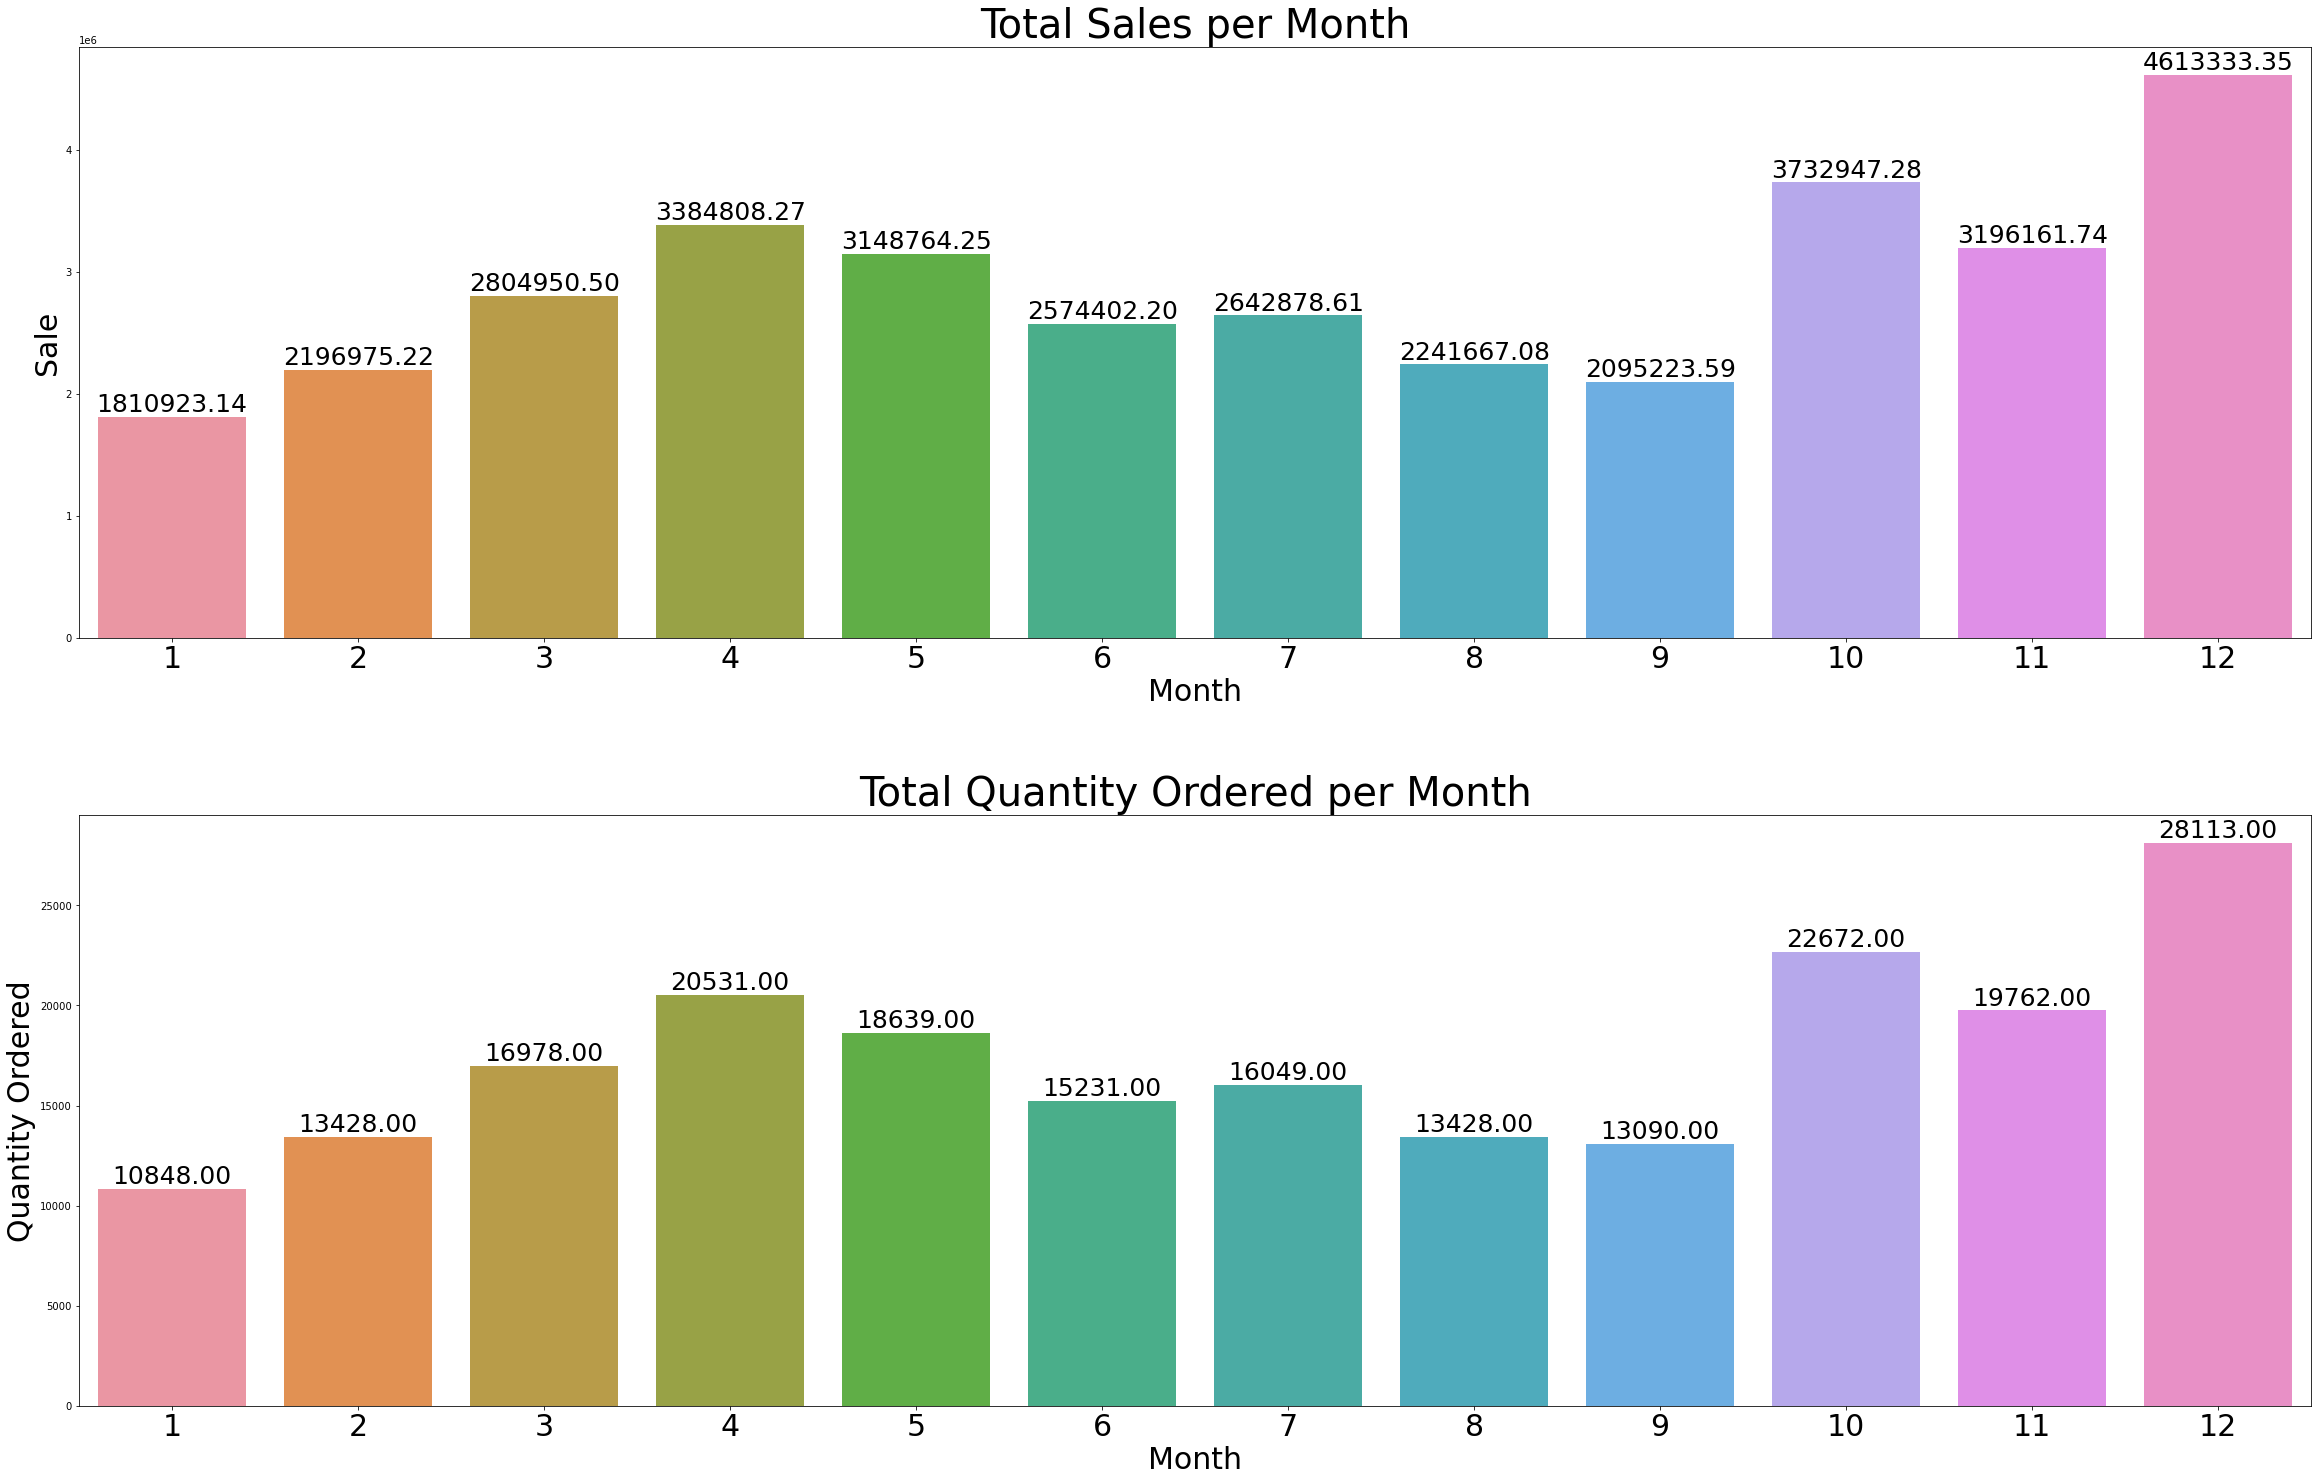

In [36]:
# data used in this section
temp_data = all_months_data.groupby(['Month']).sum().reset_index()

#
fig, axes = plt.subplots(2, 1, figsize = (40,25))
fig.subplots_adjust(hspace=.3)

sns.barplot(x='Month', y='Sale', data=temp_data, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=30)
axes[0].set_ylabel(axes[0].get_ylabel(), size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=25)
axes[0].set_title('Total Sales per Month', size= 40)

# -------

# 
sns.barplot(x='Month', y='Quantity Ordered', data=temp_data, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=30)
axes[1].set_ylabel(axes[1].get_ylabel(), size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=25)
axes[1].set_title('Total Quantity Ordered per Month', size= 40)

C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Title')

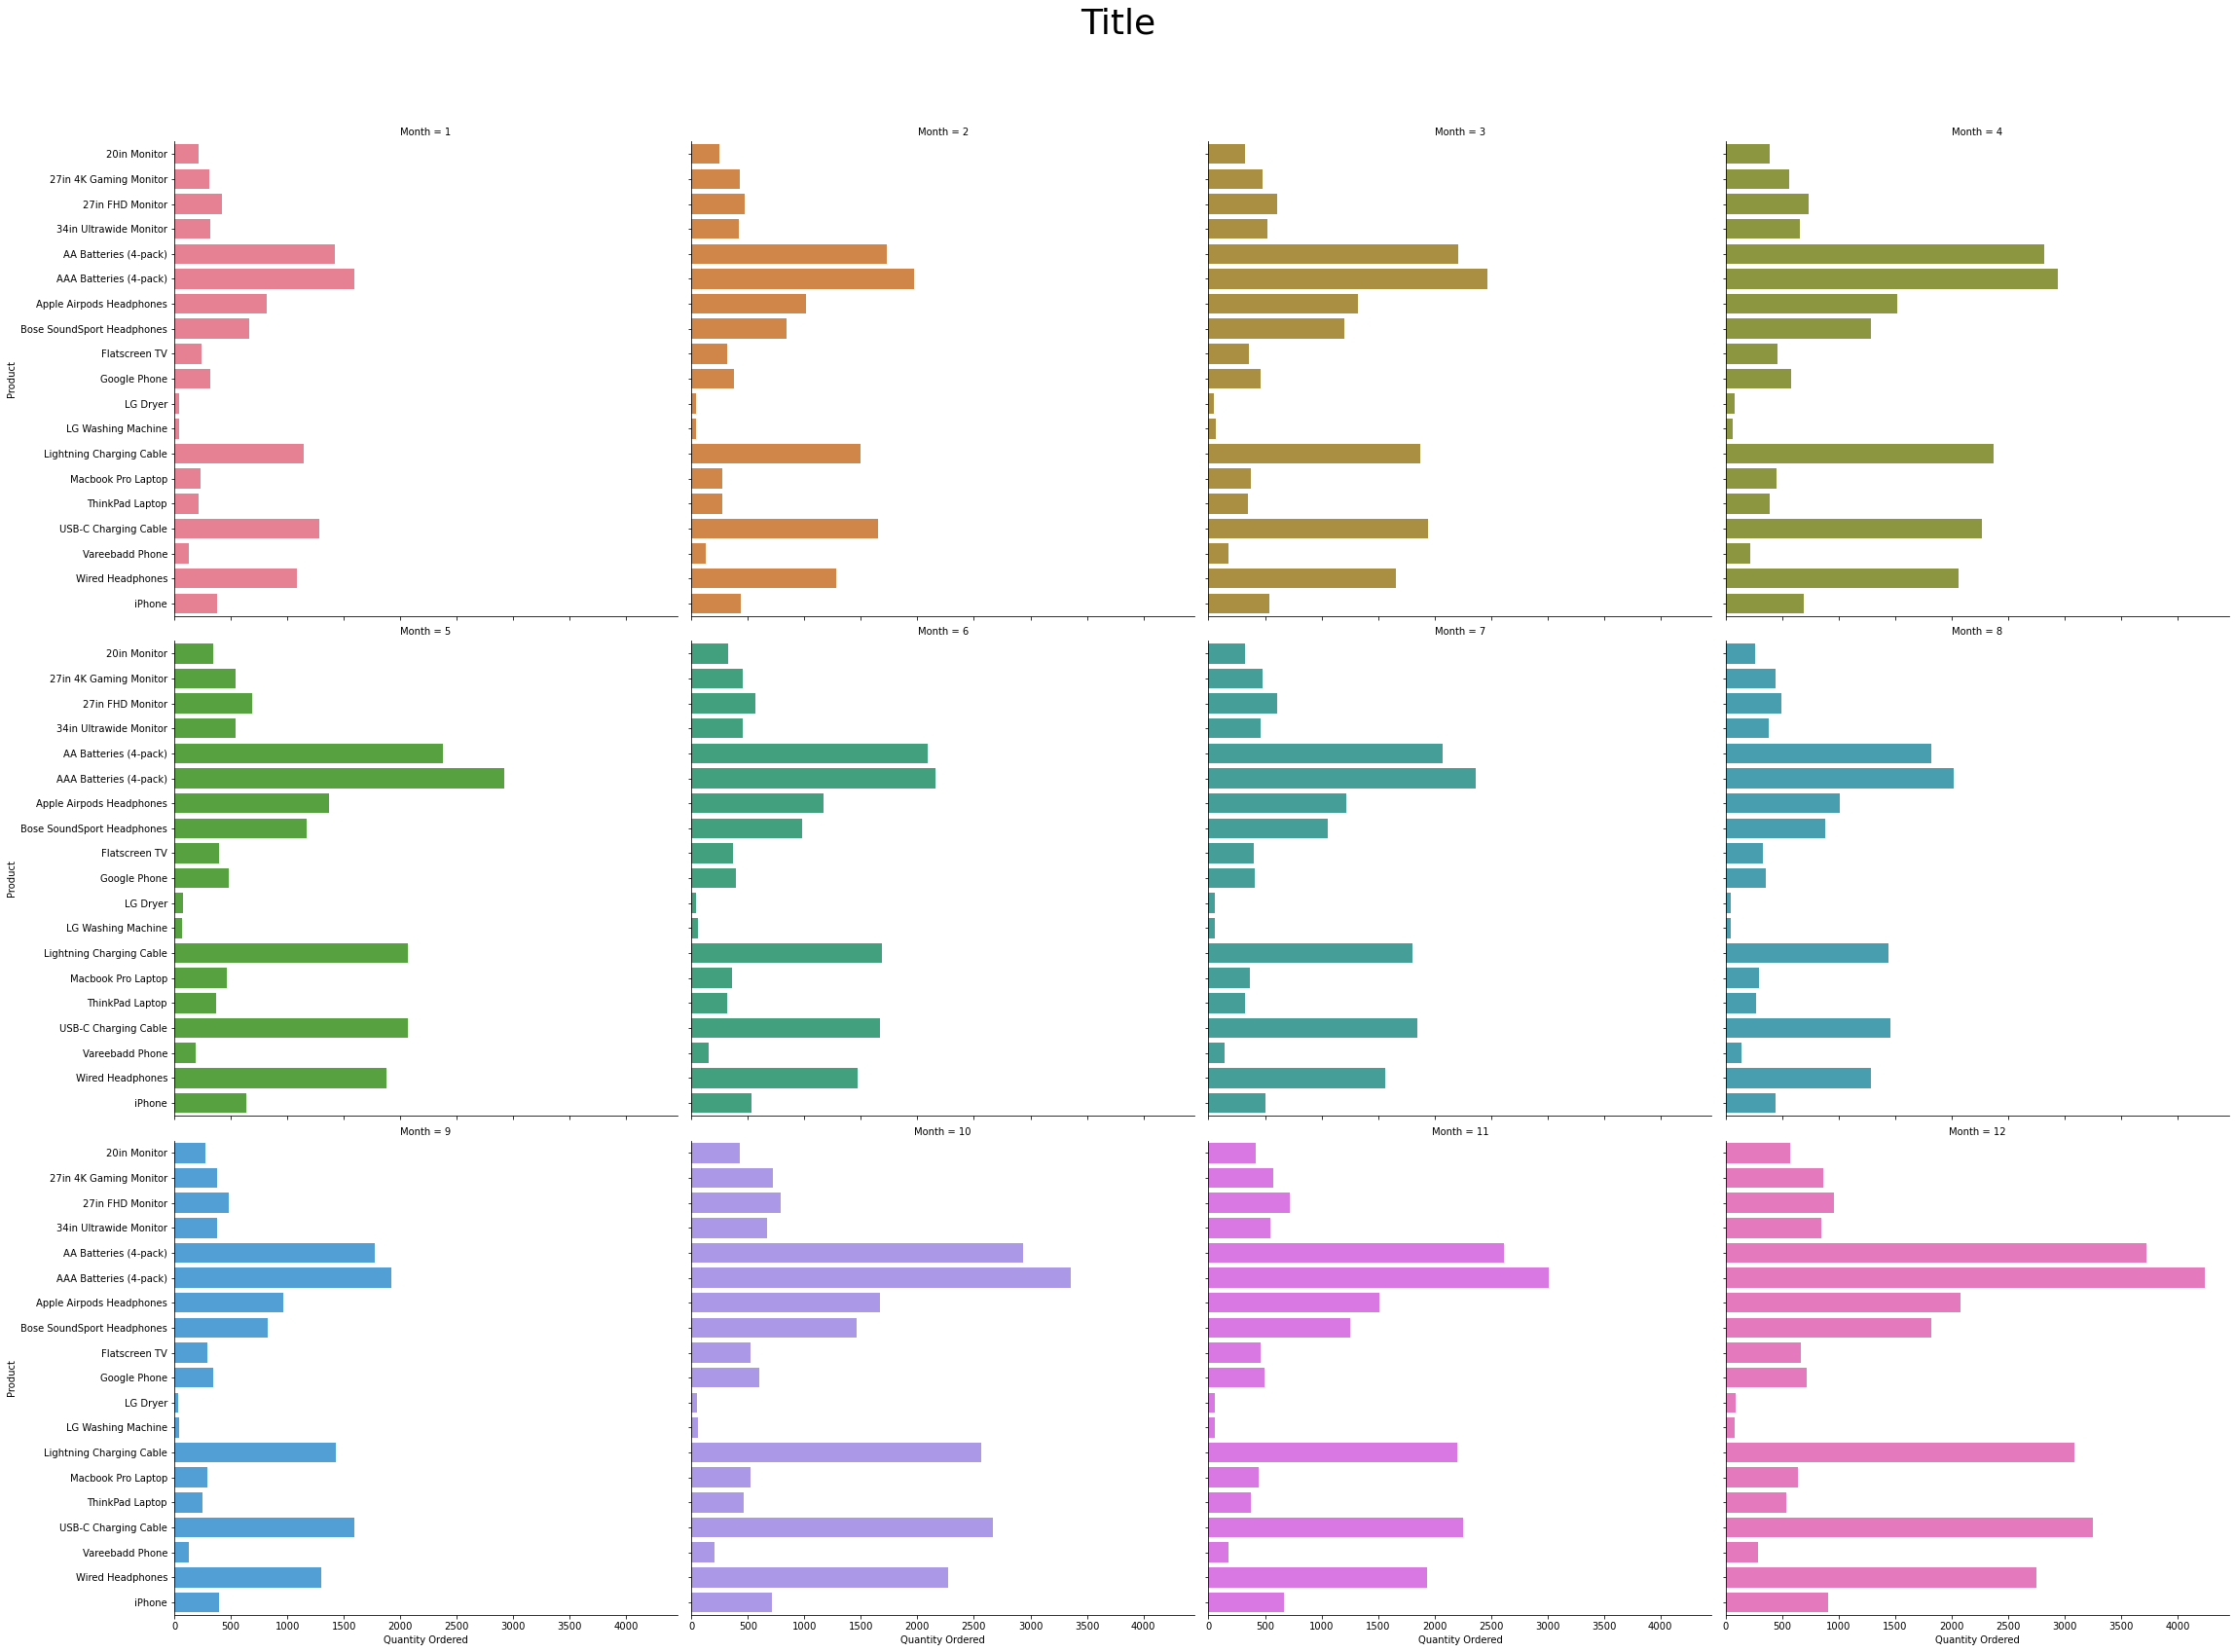

In [38]:
# data used in this section
temp_data = all_months_data.groupby(['Month', 'Product']).sum().reset_index()

#
g = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
g.map(sns.barplot, "Quantity Ordered", "Product")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=36)

C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Title')

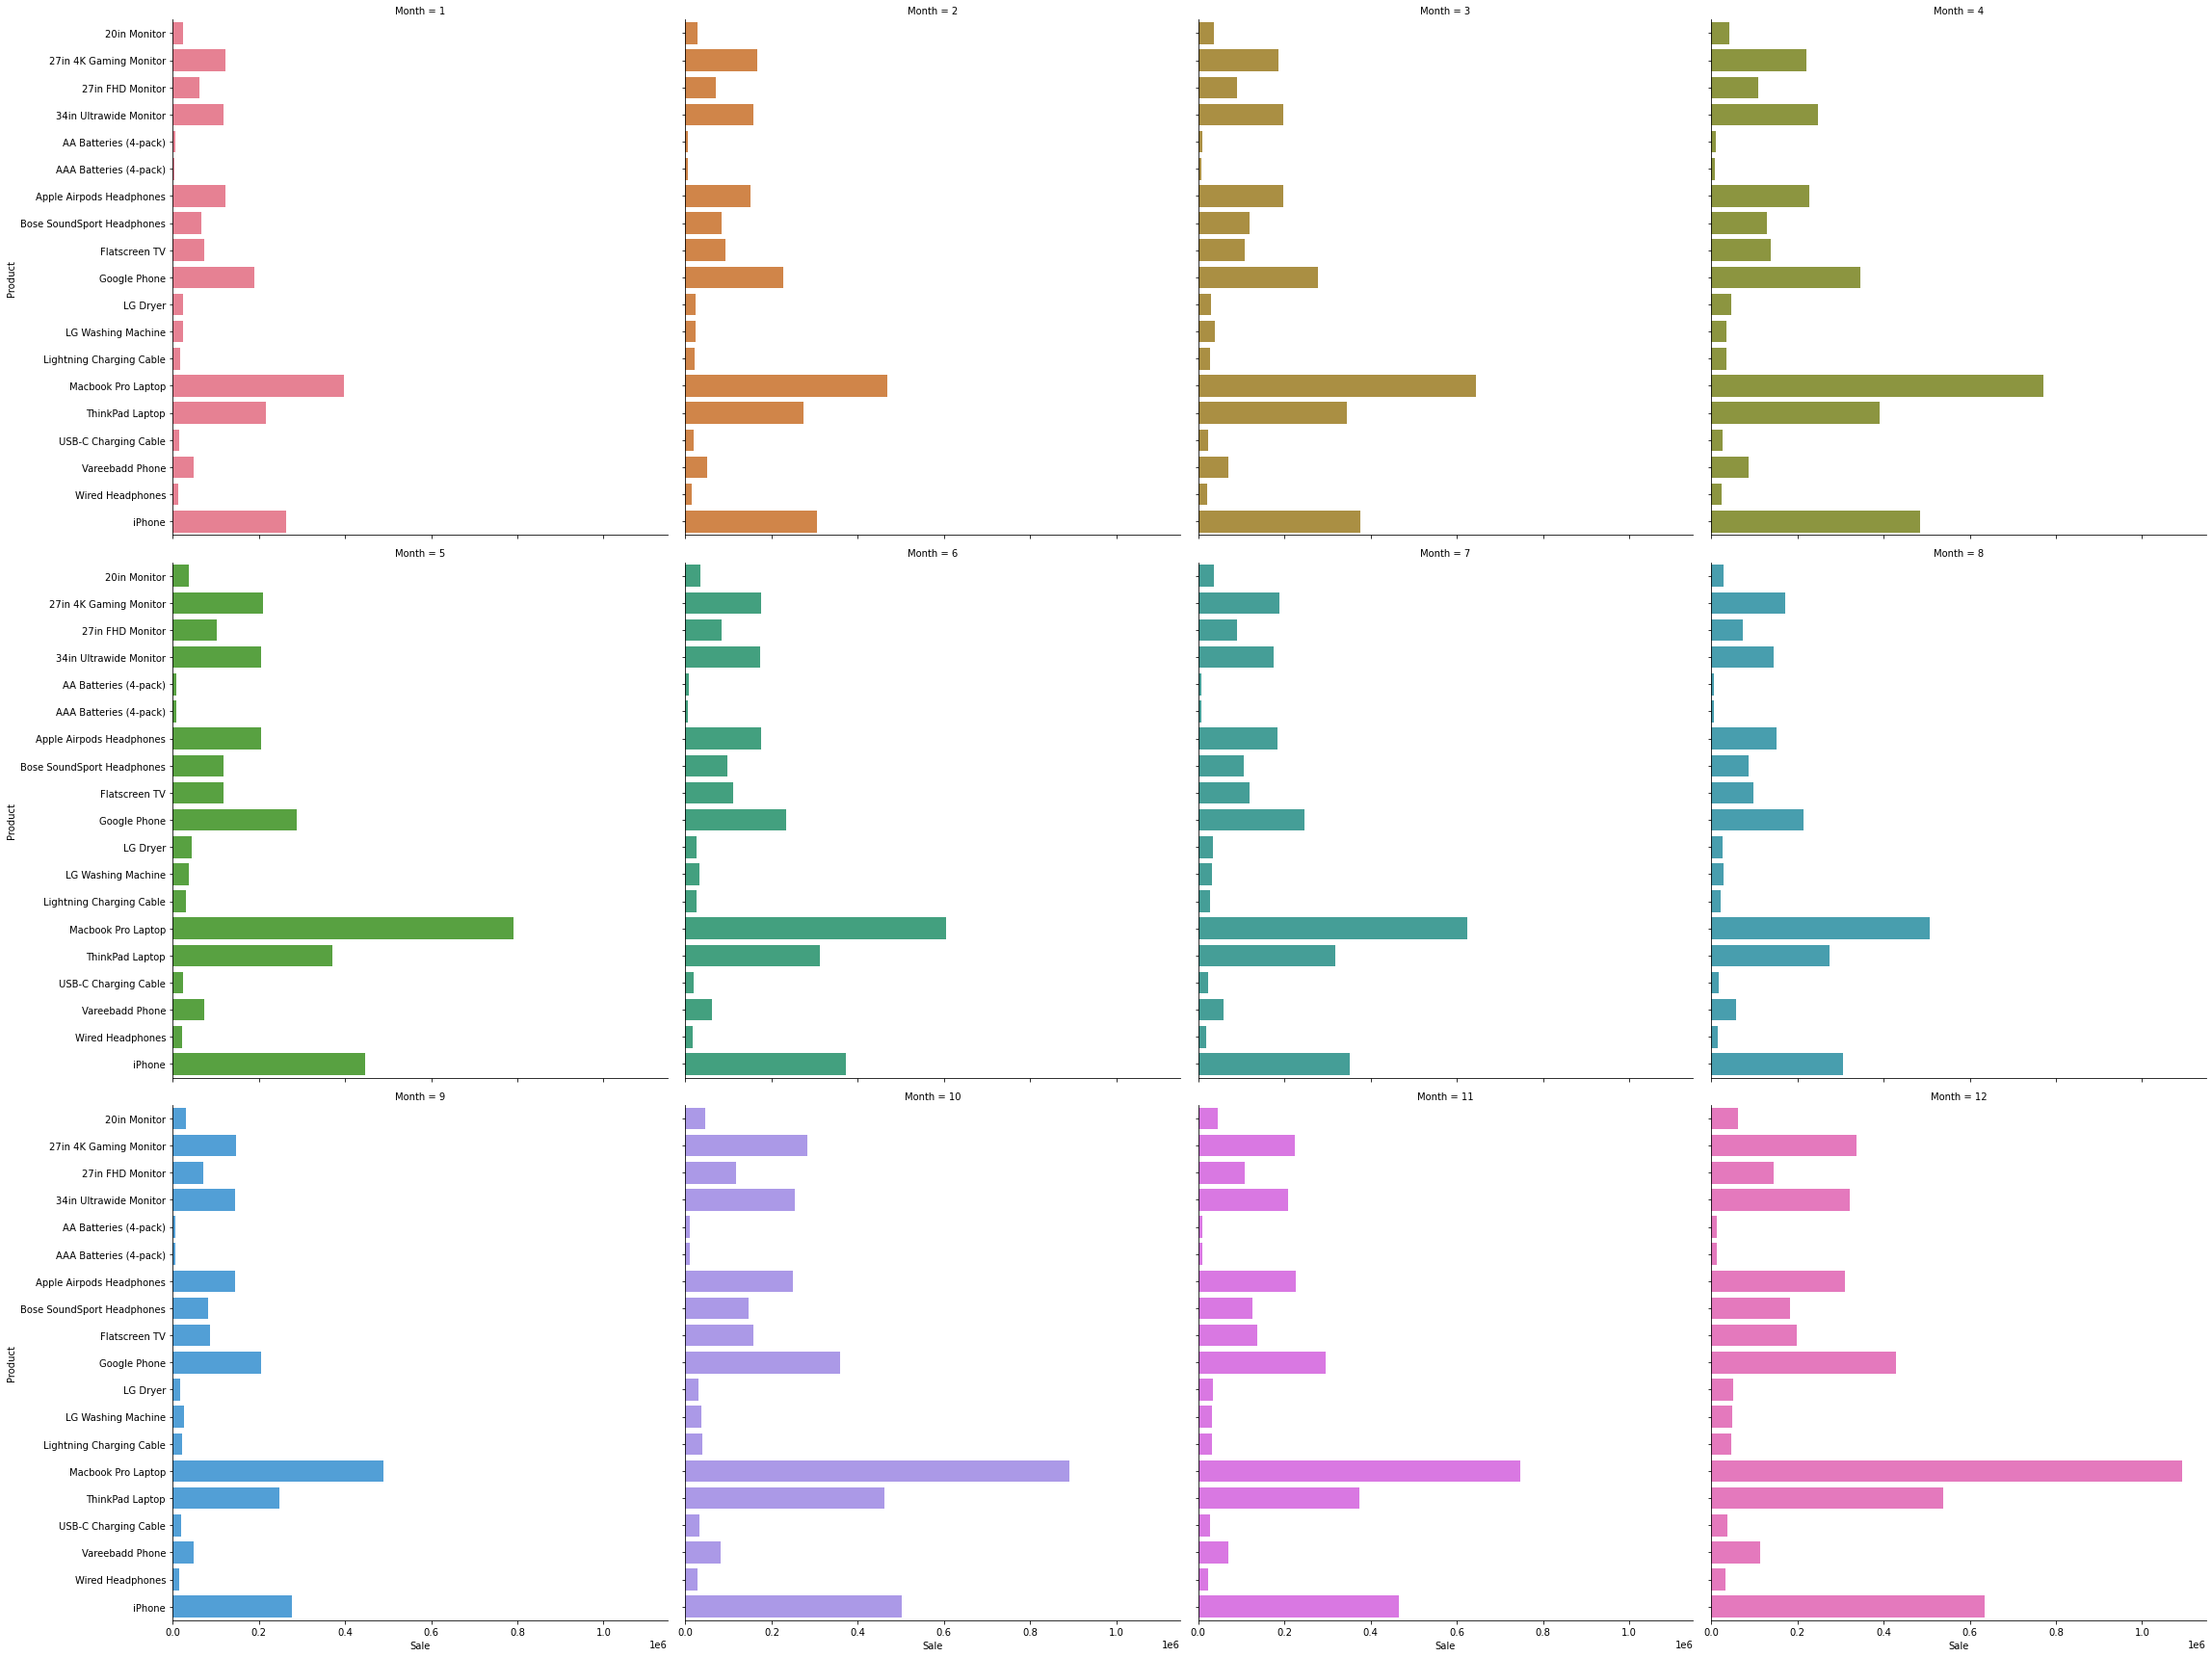

In [39]:
# data used in this section
temp_data = all_months_data.groupby(['Month', 'Product']).sum().reset_index()

#
ax = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
ax.map(sns.barplot, "Sale", "Product")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=36)

Text(0.5, 1.0, 'h')

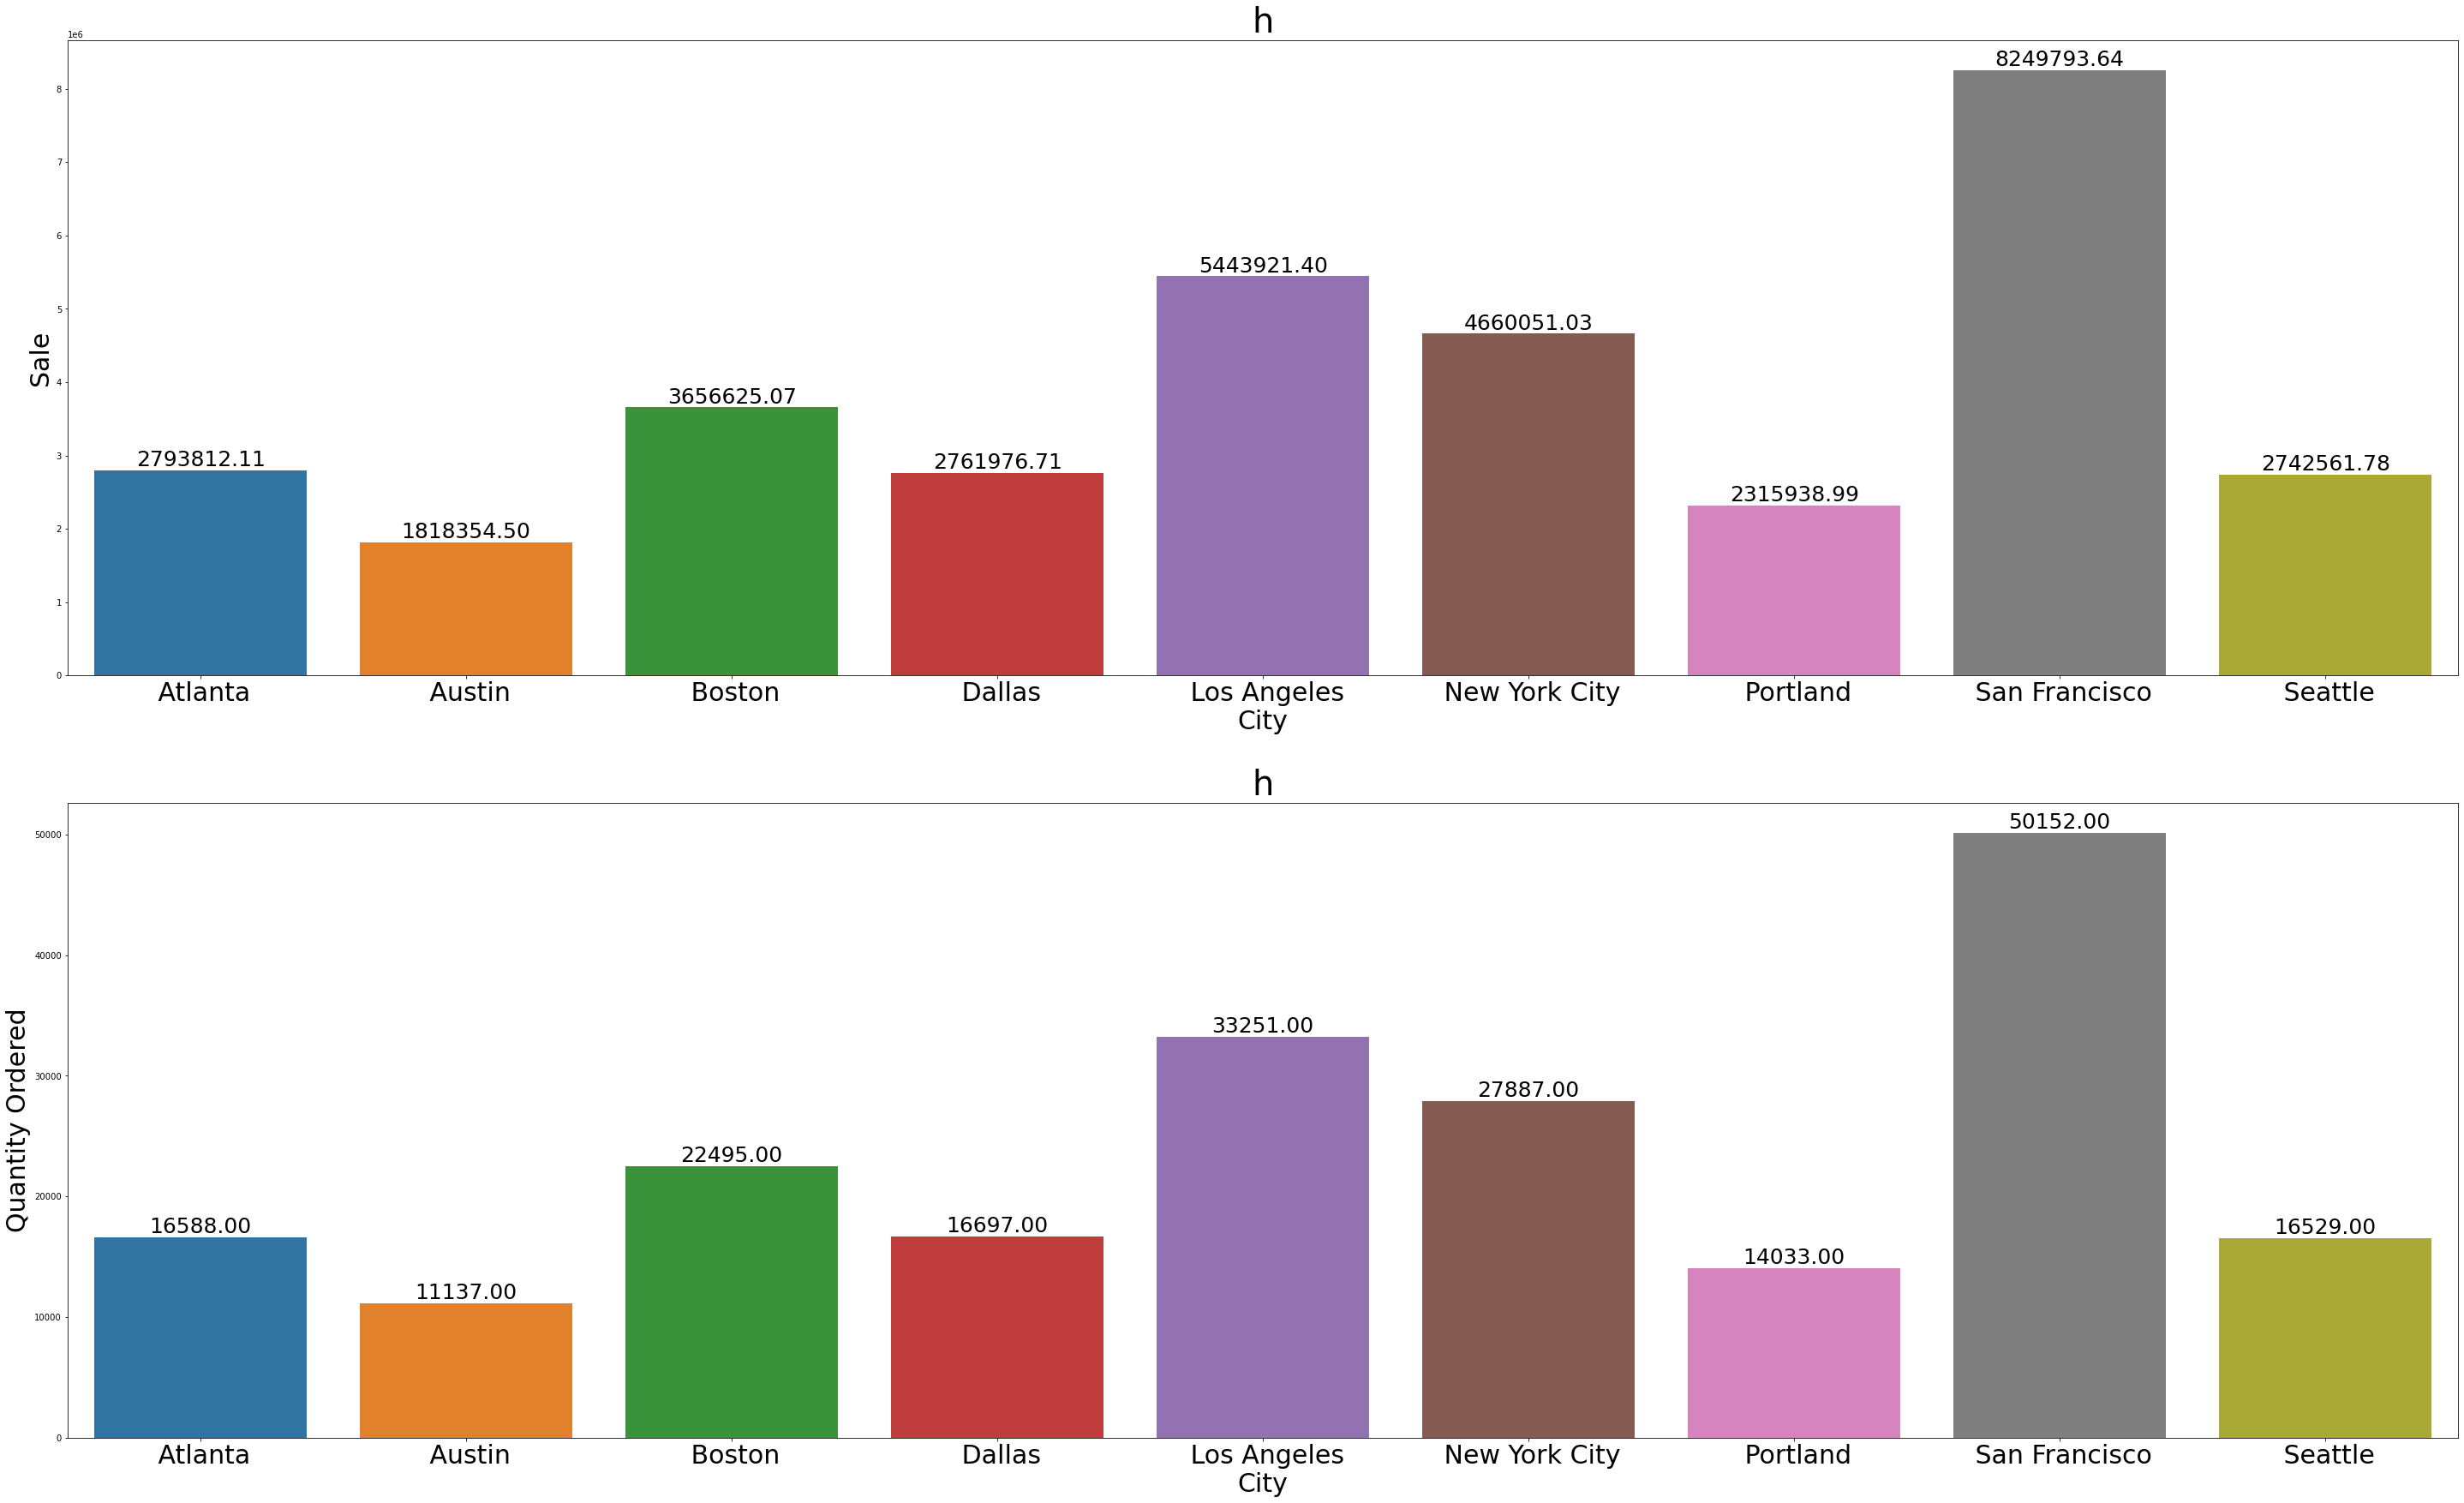

In [40]:
# data used in this section
temp_data = all_months_data.groupby(['City']).sum().reset_index()

#
fig, axes = plt.subplots(2, 1, figsize = (50, 30))
sns.barplot(x='City', y='Sale', data=temp_data, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=30)
axes[0].set_ylabel(axes[0].get_ylabel(), size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=25)
axes[0].set_title('h', size= 40)

# -------

# 
sns.barplot(x='City', y='Quantity Ordered', data=temp_data, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=30)
axes[1].set_ylabel(axes[1].get_ylabel(), size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=25)
axes[1].set_title('h', size= 40)

C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'City/Product/Total Sale')

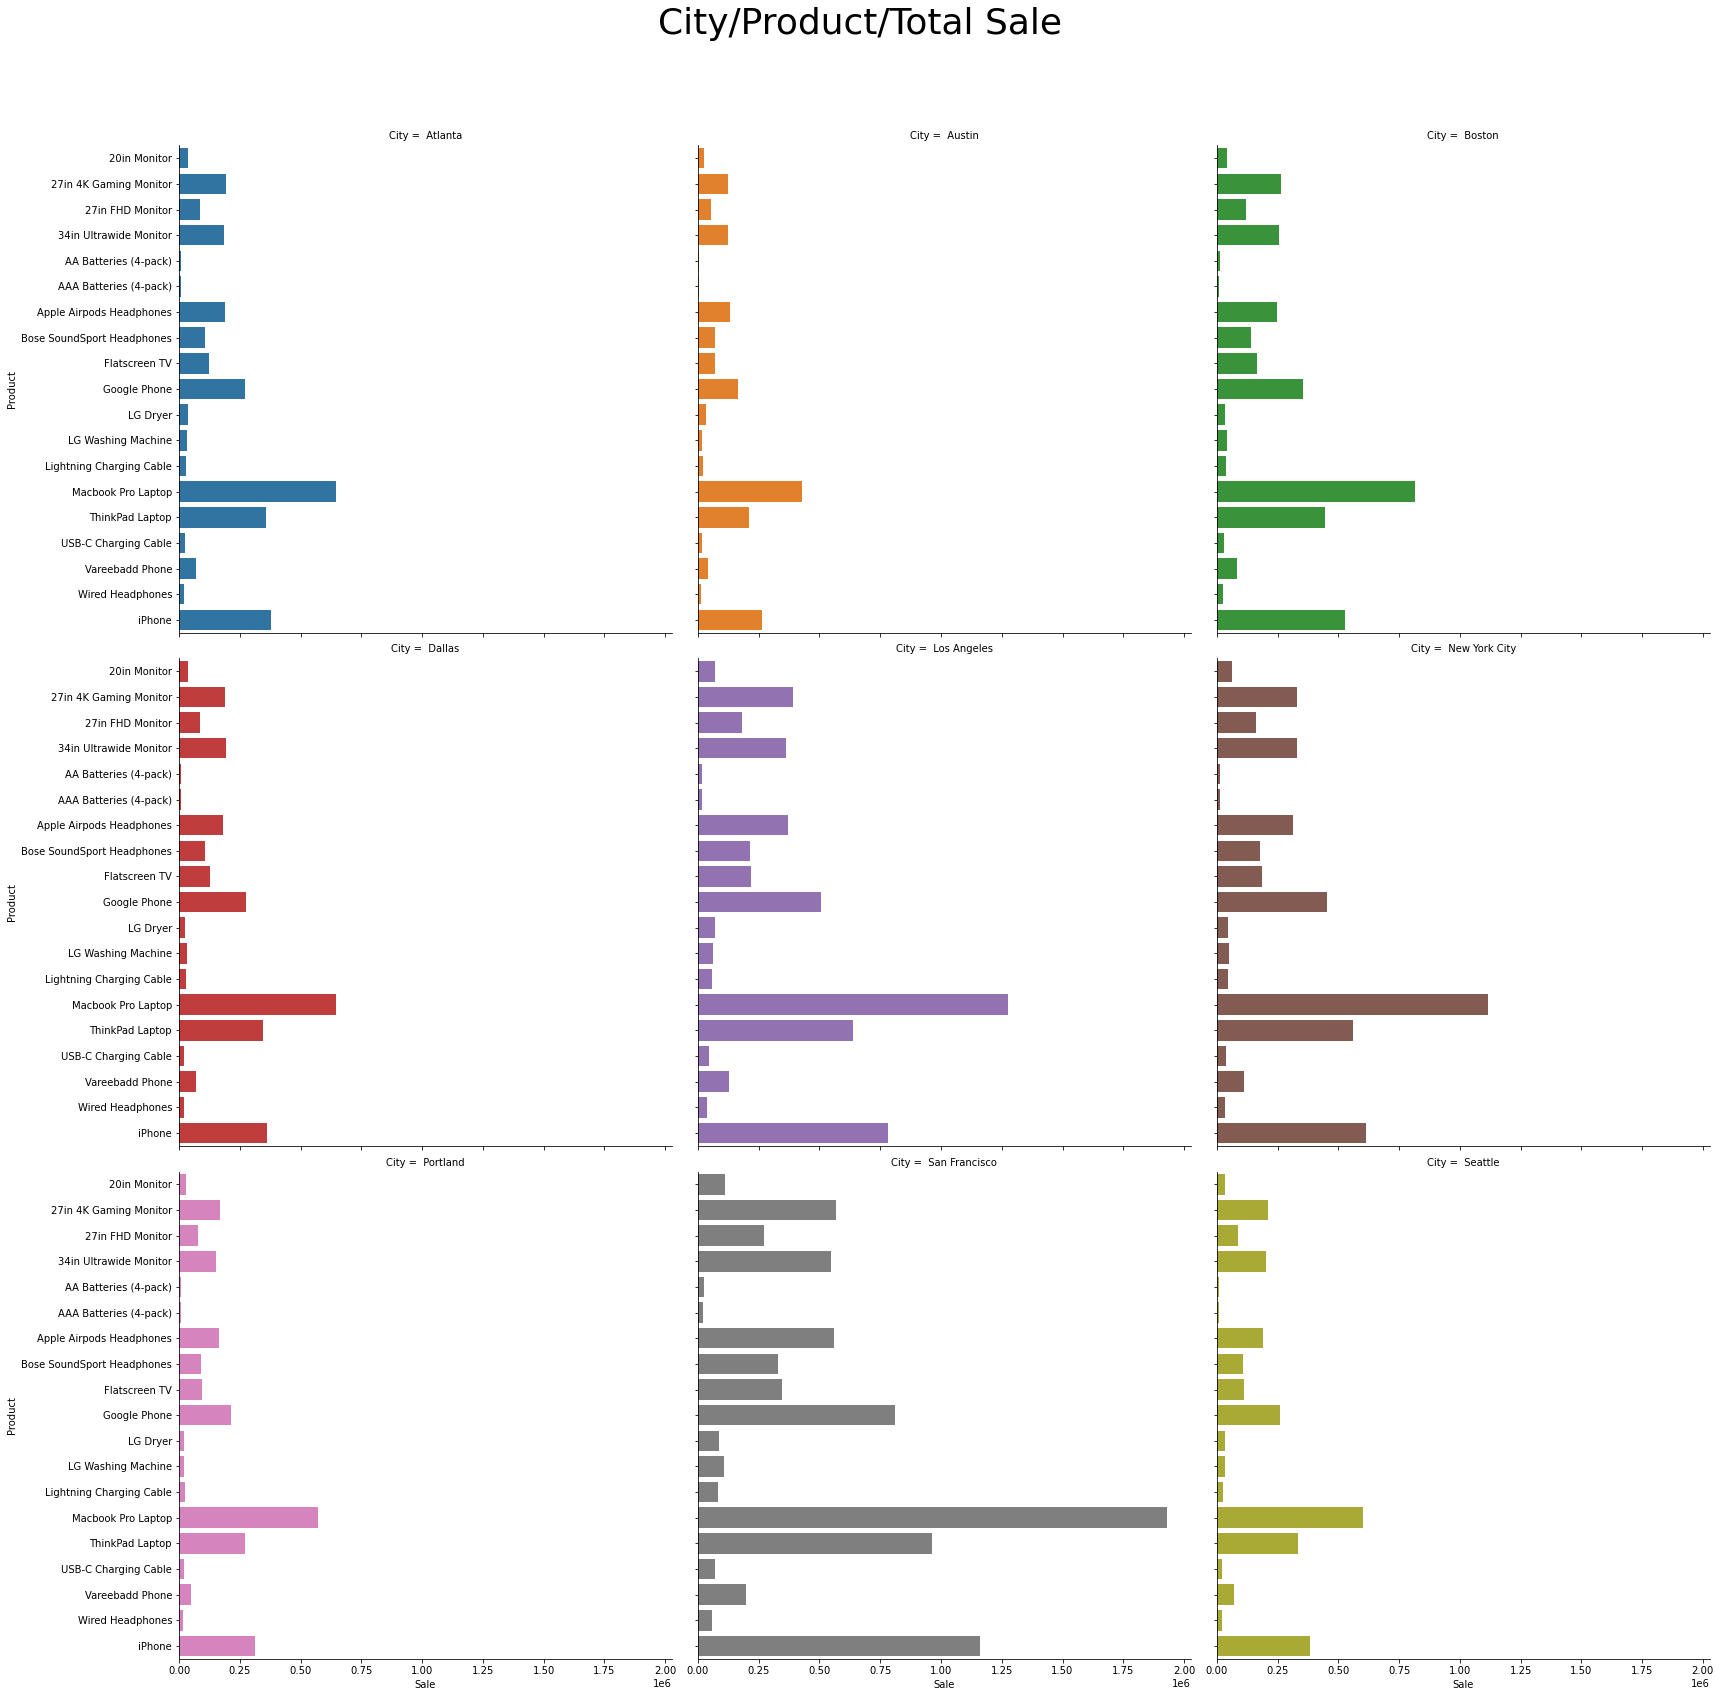

In [41]:
# data used in this section
temp_data = all_months_data.groupby(['City', 'Product']).sum().reset_index()

ax = sns.FacetGrid(temp_data, col="City", hue='City', col_wrap=3, size=8)
ax.map(sns.barplot, "Sale", "Product")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('City/Product/Total Sale', fontsize=36)

C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Naveen Kumar R\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'City/Product/Quantity Ordered')

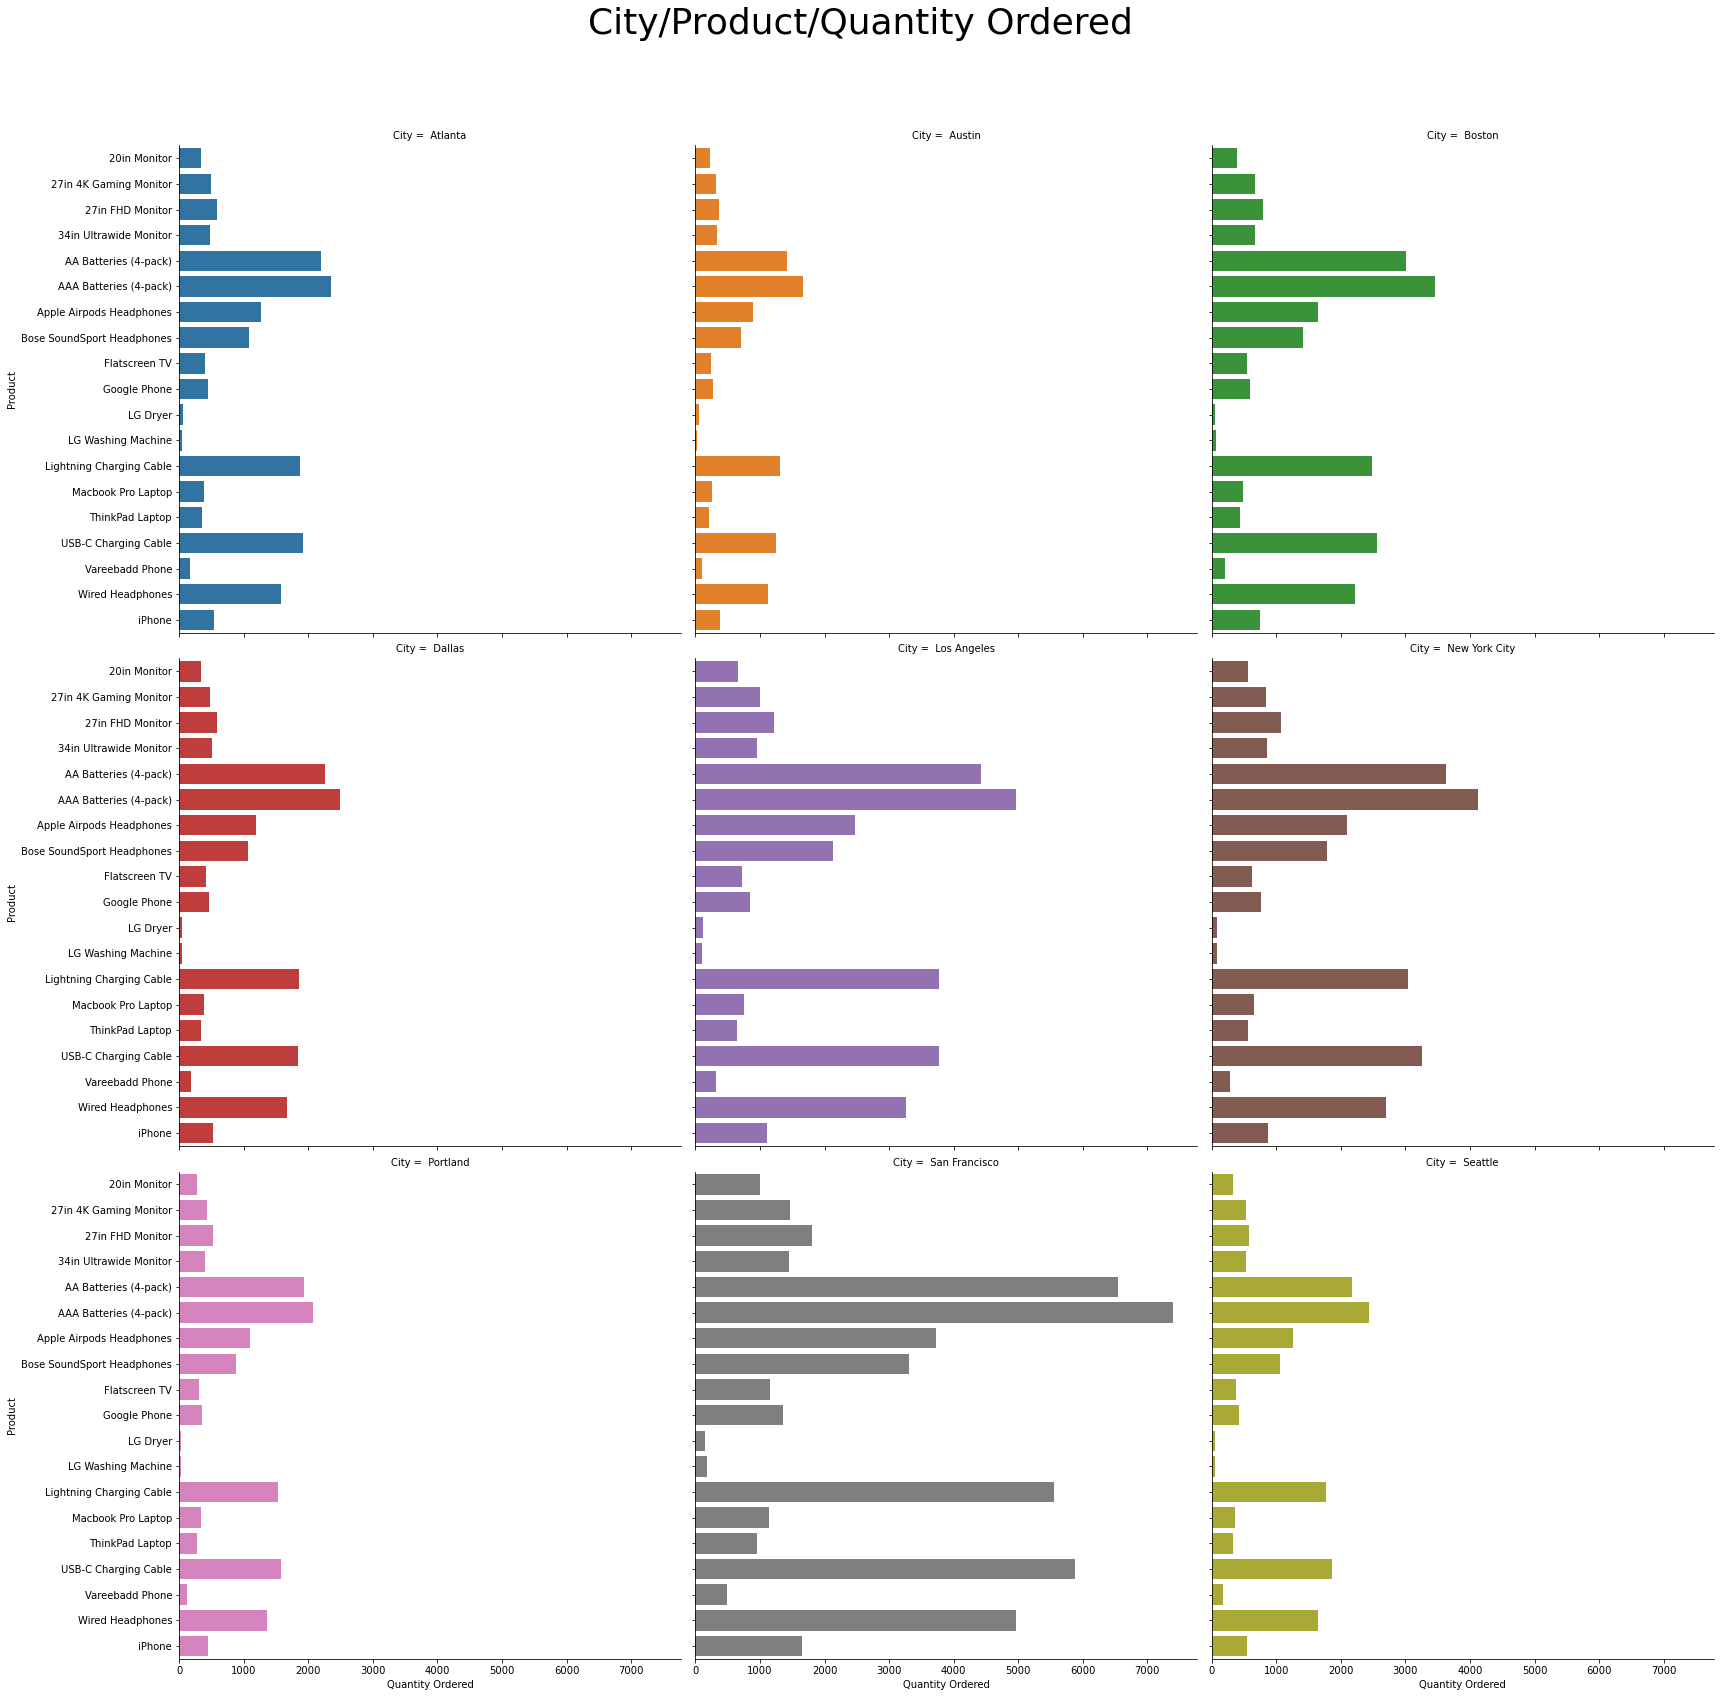

In [42]:
# data used in this section
temp_data = all_months_data.groupby(['City', 'Product']).sum().reset_index()

ax = sns.FacetGrid(temp_data, col="City", hue='City', col_wrap=3, size=8)
ax.map(sns.barplot, "Quantity Ordered", "Product")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('City/Product/Quantity Ordered', fontsize=36)

In [43]:
all_months_data[['Postal Code', 'State', 'City']].value_counts()

Postal Code  State  City          
94016        CA      San Francisco    44656
90001        CA      Los Angeles      29572
10001        NY      New York City    24841
02215        MA      Boston           19905
30301        GA      Atlanta          14868
75001        TX      Dallas           14795
98101        WA      Seattle          14710
97035        OR      Portland          9993
73301        TX      Austin            9893
04101        ME      Portland          2452
dtype: int64

In [44]:
# data used in this section
temp_data = all_months_data.groupby(['Postal Code', 'State', 'City']).sum().reset_index()
temp_data.head(11).sort_values(by=['Sale'], ascending=False)[['Postal Code', 'State', 'City', 'Sale', 'Quantity Ordered']]

,Postal Code,State,City,Sale,Quantity Ordered
7,94016,CA,San Francisco,8249793.64,50152.0
6,90001,CA,Los Angeles,5443921.40,33251.0
2,10001,NY,New York City,4660051.03,27887.0
0,02215,MA,Boston,3656625.07,22495.0
3,30301,GA,Atlanta,2793812.11,16588.0
5,75001,TX,Dallas,2761976.71,16697.0
9,98101,WA,Seattle,2742561.78,16529.0
8,97035,OR,Portland,1866584.61,11286.0
4,73301,TX,Austin,1818354.50,11137.0
1,04101,ME,Portland,449354.38,2747.0


In [46]:
# data used in this section
temp_data = pd.concat([all_months_data.groupby(['Hour']).count()['Product'], 
                       all_months_data.groupby(['Hour']).sum()[['Sale', 'Quantity Ordered']]], axis=1).reset_index()
temp_data.columns = ['Hour', 'Number of Orders', 'Total Sale', 'Quantity Ordered']

temp_data

,Hour,Number of Orders,Total Sale,Quantity Ordered
0,0,3891,710416.71,4403.0
1,1,2337,457863.19,2606.0
2,2,1237,231574.56,1392.0
3,3,827,144683.04,921.0
4,4,849,162296.10,932.0
5,5,1317,229474.89,1489.0
6,6,2480,448107.02,2808.0
7,7,4006,743156.19,4551.0
8,8,6248,1191860.53,6993.0
9,9,8740,1638637.84,9808.0


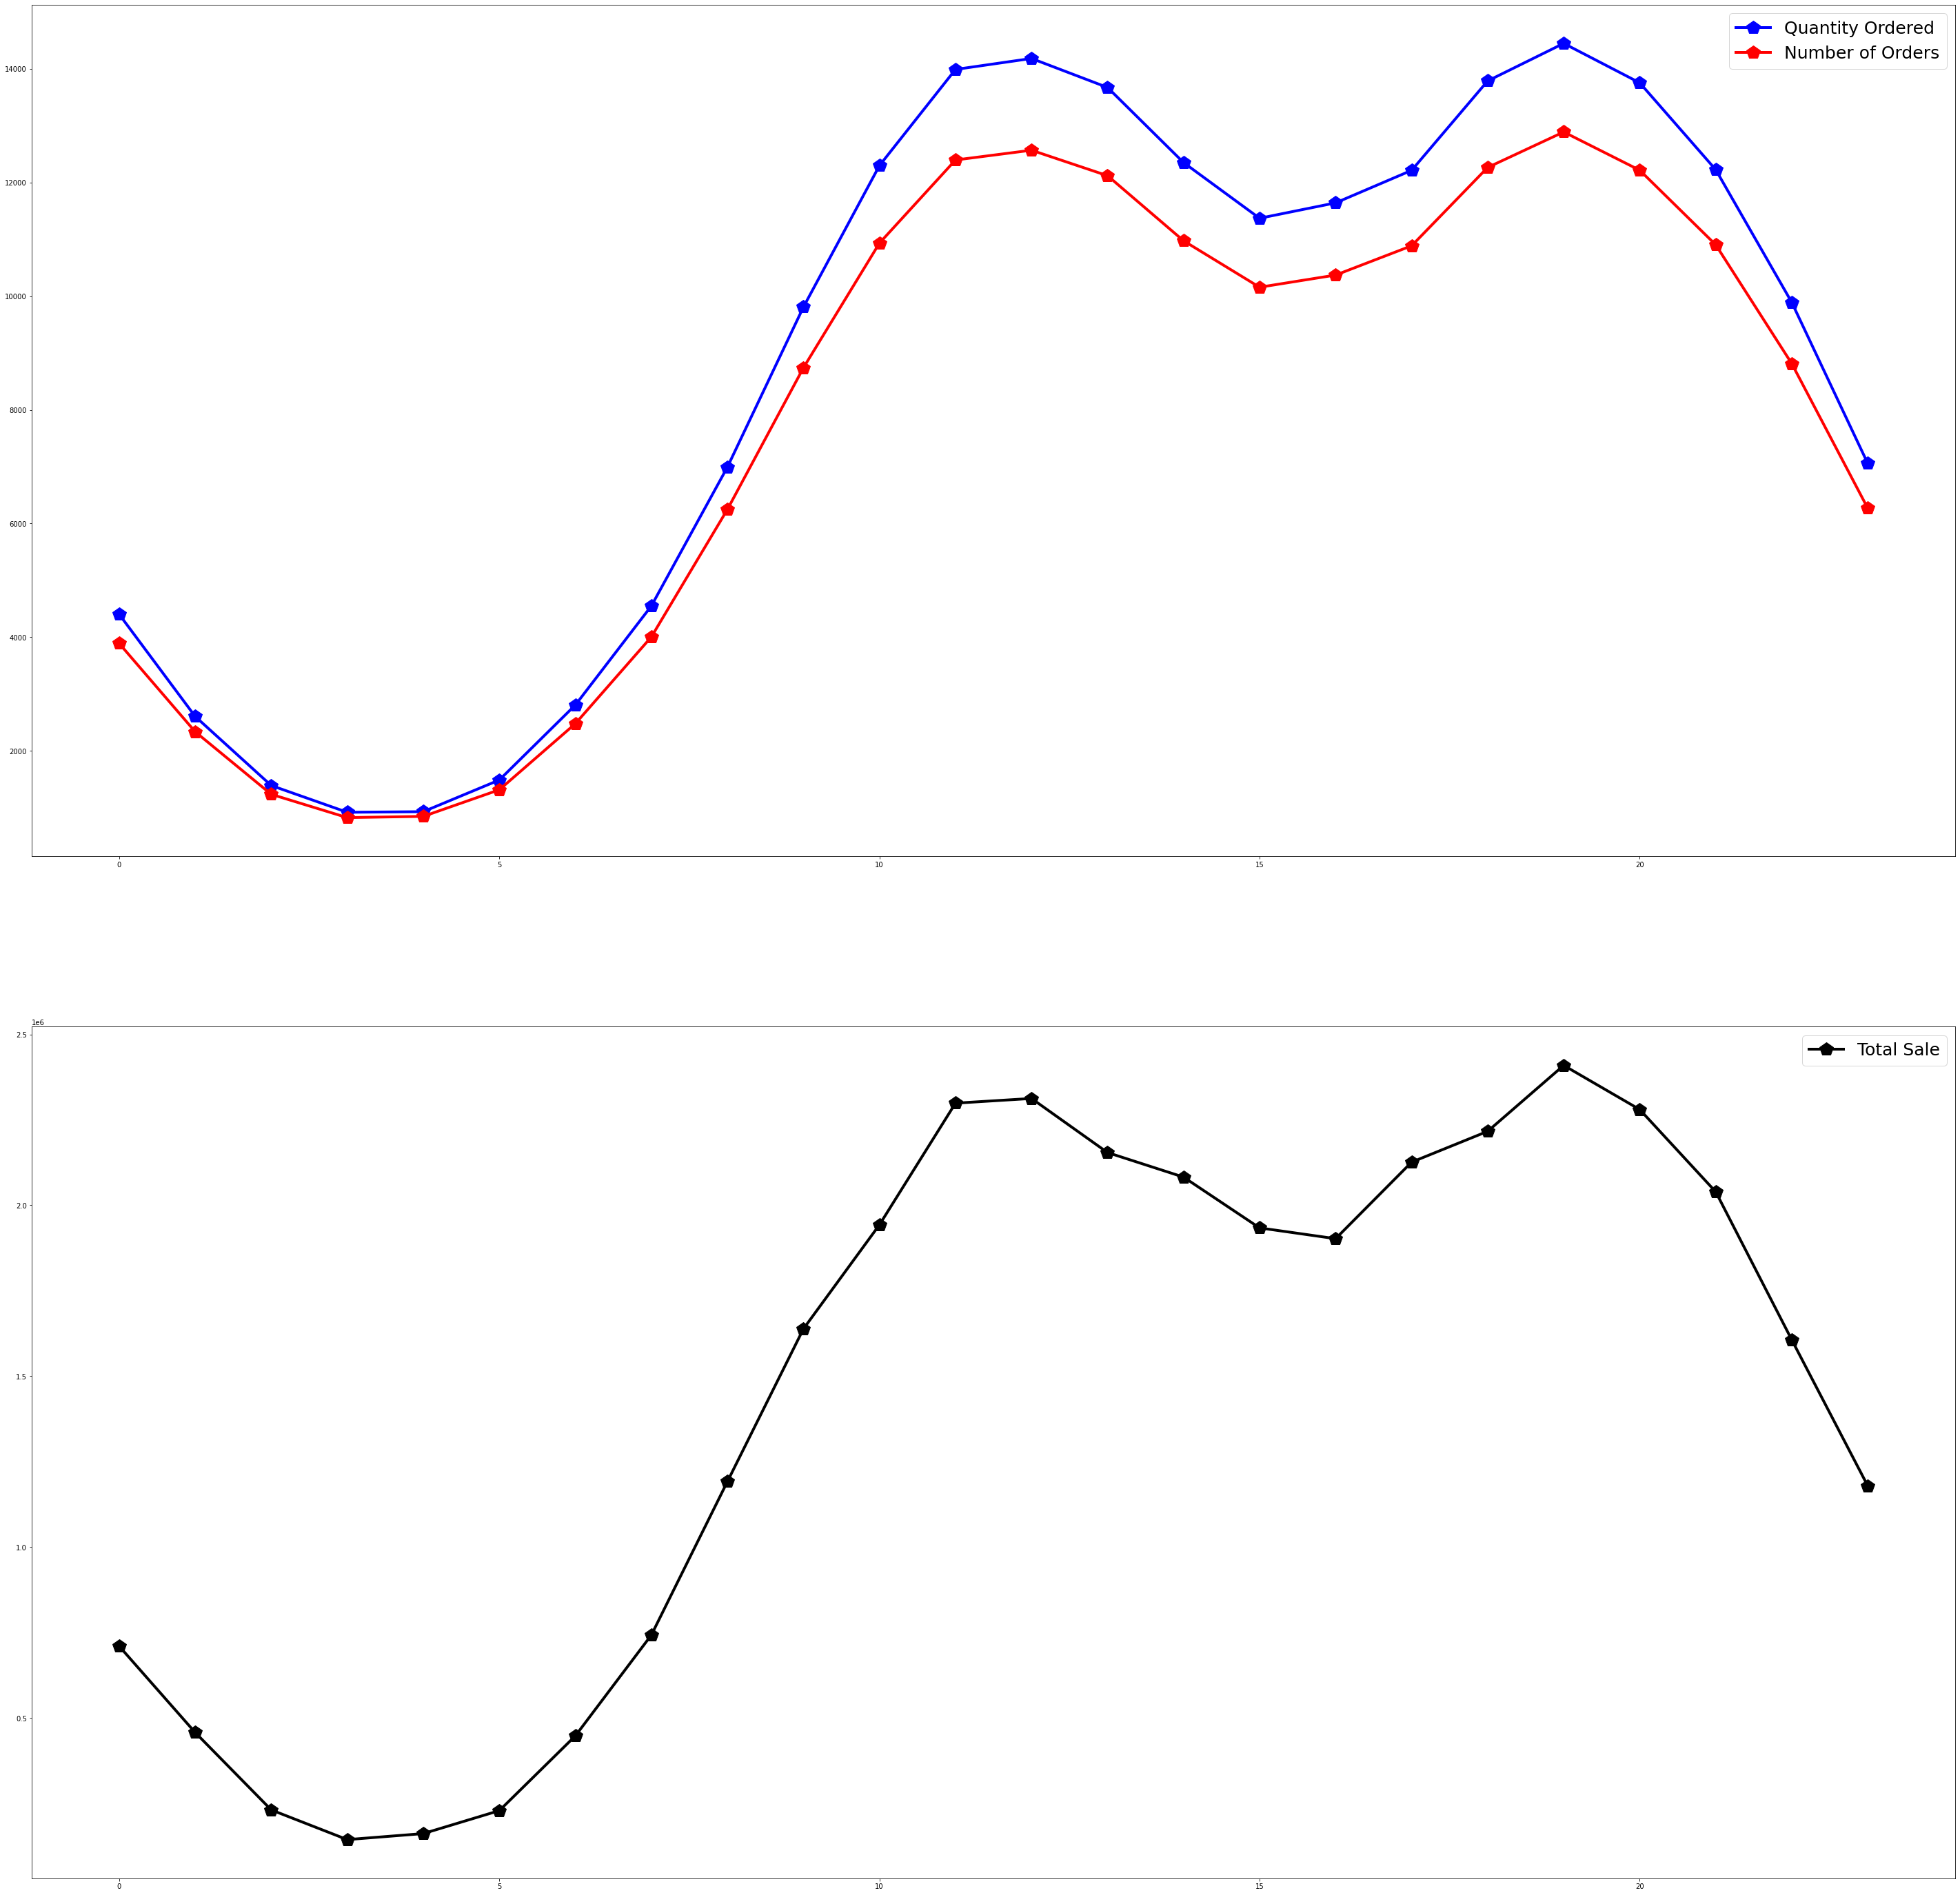

In [47]:
fig, axes = plt.subplots(2, 1, figsize = (50, 50))

axes[0].plot(temp_data['Hour'], temp_data['Quantity Ordered'], '-p', color='blue', markerfacecolor='blue', 
             markersize=20, linewidth=4, label = "Quantity Ordered")
axes[0].plot(temp_data['Hour'], temp_data['Number of Orders'], '-p', color='red', markerfacecolor='red', 
             markersize=20, linewidth=4, label = "Number of Orders")
axes[0].legend(fontsize=25)

axes[1].plot(temp_data['Hour'], temp_data['Total Sale'], '-p', color='black', markerfacecolor='black', 
             markersize=20, linewidth=4, label = "Total Sale")
axes[1].legend(fontsize=25)